# Dendogram with Plotly Figure Factory

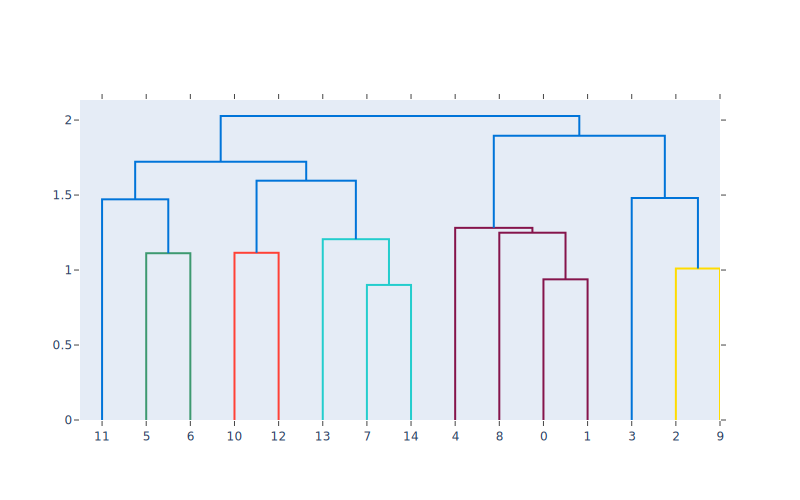

In [2]:
import plotly.figure_factory as ff
import numpy as np
np.random.seed(1)

X = np.random.rand(15, 12) # 15 samples, with 12 dimensions each
fig = ff.create_dendrogram(X)
fig.update_layout(width=800, height=500)
fig.show()

## Set Color Threshold

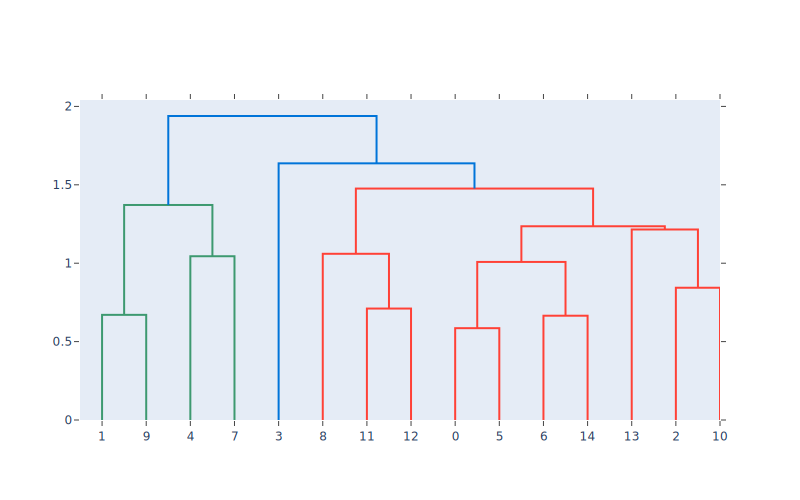

In [3]:
import plotly.figure_factory as ff

import numpy as np

X = np.random.rand(15, 10) # 15 samples, with 10 dimensions each
fig = ff.create_dendrogram(X, color_threshold=1.5)
fig.update_layout(width=800, height=500)
fig.show()

## Set Orientation and Add Labels

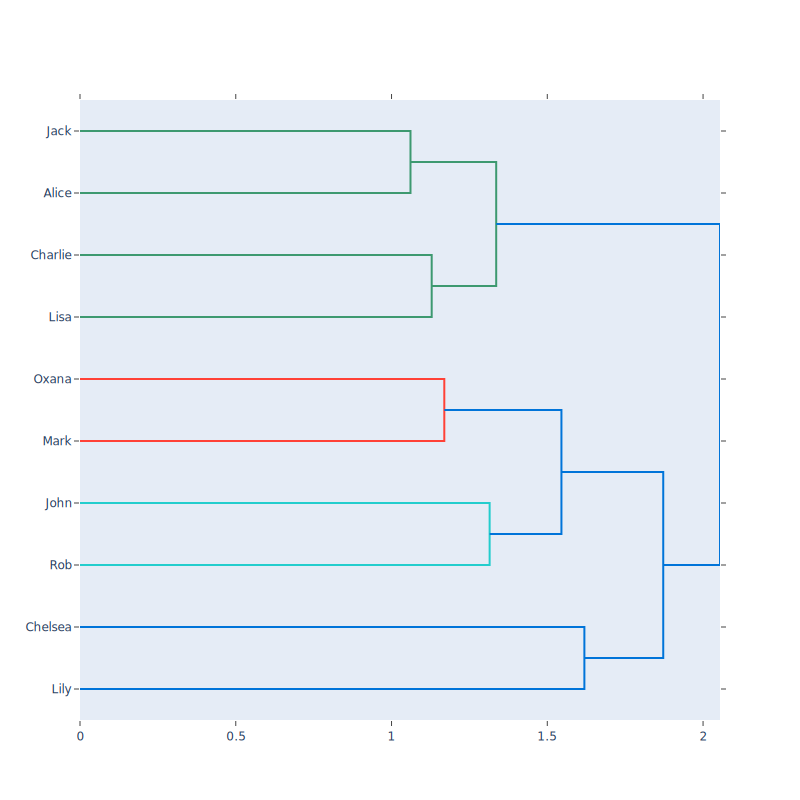

In [4]:
import plotly.figure_factory as ff

import numpy as np

X = np.random.rand(10, 12)
names = ['Jack', 'Oxana', 'John', 'Chelsea', 'Mark', 'Alice', 'Charlie', 'Rob', 'Lisa', 'Lily']
fig = ff.create_dendrogram(X, orientation='left', labels=names)
fig.update_layout(width=800, height=800)
fig.show()

## Dendrogram with a Heatmap

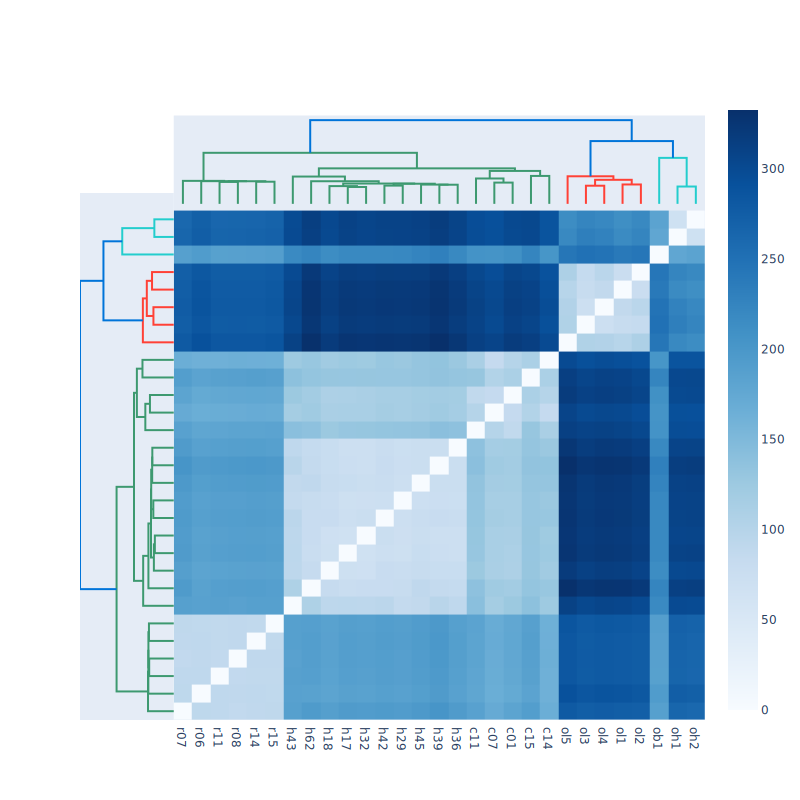

In [5]:
import plotly.graph_objects as go
import plotly.figure_factory as ff

import numpy as np
from scipy.spatial.distance import pdist, squareform


# get data
data = np.genfromtxt("http://files.figshare.com/2133304/ExpRawData_E_TABM_84_A_AFFY_44.tab",
                     names=True,usecols=tuple(range(1,30)),dtype=float, delimiter="\t")
data_array = data.view((float, len(data.dtype.names)))
data_array = data_array.transpose()
labels = data.dtype.names

# Initialize figure by creating upper dendrogram
fig = ff.create_dendrogram(data_array, orientation='bottom', labels=labels)
for i in range(len(fig['data'])):
    fig['data'][i]['yaxis'] = 'y2'

# Create Side Dendrogram
dendro_side = ff.create_dendrogram(data_array, orientation='right')
for i in range(len(dendro_side['data'])):
    dendro_side['data'][i]['xaxis'] = 'x2'

# Add Side Dendrogram Data to Figure
for data in dendro_side['data']:
    fig.add_trace(data)

# Create Heatmap
dendro_leaves = dendro_side['layout']['yaxis']['ticktext']
dendro_leaves = list(map(int, dendro_leaves))
data_dist = pdist(data_array)
heat_data = squareform(data_dist)
heat_data = heat_data[dendro_leaves,:]
heat_data = heat_data[:,dendro_leaves]

heatmap = [
    go.Heatmap(
        x = dendro_leaves,
        y = dendro_leaves,
        z = heat_data,
        colorscale = 'Blues'
    )
]

heatmap[0]['x'] = fig['layout']['xaxis']['tickvals']
heatmap[0]['y'] = dendro_side['layout']['yaxis']['tickvals']

# Add Heatmap Data to Figure
for data in heatmap:
    fig.add_trace(data)

# Edit Layout
fig.update_layout({'width':800, 'height':800,
                         'showlegend':False, 'hovermode': 'closest',
                         })
# Edit xaxis
fig.update_layout(xaxis={'domain': [.15, 1],
                                  'mirror': False,
                                  'showgrid': False,
                                  'showline': False,
                                  'zeroline': False,
                                  'ticks':""})
# Edit xaxis2
fig.update_layout(xaxis2={'domain': [0, .15],
                                   'mirror': False,
                                   'showgrid': False,
                                   'showline': False,
                                   'zeroline': False,
                                   'showticklabels': False,
                                   'ticks':""})

# Edit yaxis
fig.update_layout(yaxis={'domain': [0, .85],
                                  'mirror': False,
                                  'showgrid': False,
                                  'showline': False,
                                  'zeroline': False,
                                  'showticklabels': False,
                                  'ticks': ""
                        })
# Edit yaxis2
fig.update_layout(yaxis2={'domain':[.825, .975],
                                   'mirror': False,
                                   'showgrid': False,
                                   'showline': False,
                                   'zeroline': False,
                                   'showticklabels': False,
                                   'ticks':""})

# Plot!
fig.show()